In [23]:
import pandas as pd
import glob
import os
import numpy as np

In [24]:
# Market watch snp 500 historical data
all_files = glob.glob(os.path.join(os.getcwd(), '*.csv'))
print(all_files)
df = pd.concat((pd.read_csv(f) for f in all_files))

df

['C:\\Users\\Michael\\Documents\\School\\CCNY DSE\\Spring 2021\\DSE_I2100_Applied_Machine_Learning_and_Data_Mining\\Project\\project-altcoinpriceprediction\\data\\snp\\Download Data - INDEX_US_S&P US_SPX (1).csv', 'C:\\Users\\Michael\\Documents\\School\\CCNY DSE\\Spring 2021\\DSE_I2100_Applied_Machine_Learning_and_Data_Mining\\Project\\project-altcoinpriceprediction\\data\\snp\\Download Data - INDEX_US_S&P US_SPX (2).csv', 'C:\\Users\\Michael\\Documents\\School\\CCNY DSE\\Spring 2021\\DSE_I2100_Applied_Machine_Learning_and_Data_Mining\\Project\\project-altcoinpriceprediction\\data\\snp\\Download Data - INDEX_US_S&P US_SPX (3).csv', 'C:\\Users\\Michael\\Documents\\School\\CCNY DSE\\Spring 2021\\DSE_I2100_Applied_Machine_Learning_and_Data_Mining\\Project\\project-altcoinpriceprediction\\data\\snp\\Download Data - INDEX_US_S&P US_SPX (4).csv', 'C:\\Users\\Michael\\Documents\\School\\CCNY DSE\\Spring 2021\\DSE_I2100_Applied_Machine_Learning_and_Data_Mining\\Project\\project-altcoinpricepre

,Date,Open,High,Low,Close
0,12/31/2015,"2,060.59","2,062.54","2,043.62","2,043.94"
1,12/30/2015,"2,077.34","2,077.34","2,061.97","2,063.36"
2,12/29/2015,"2,060.54","2,081.56","2,060.54","2,078.36"
3,12/28/2015,"2,057.77","2,057.77","2,044.20","2,056.50"
4,12/24/2015,"2,063.52","2,067.36","2,058.73","2,060.99"
...,...,...,...,...,...
246,01/09/2017,"2,273.59","2,275.49","2,268.90","2,268.90"
247,01/06/2017,"2,271.14","2,282.10","2,264.06","2,276.98"
248,01/05/2017,"2,268.18","2,271.50","2,260.45","2,269.00"
249,01/04/2017,"2,261.60","2,272.82","2,261.60","2,270.75"


In [25]:
df.index = pd.to_datetime(df['Date'])
df = df.drop('Date', axis=1).sort_index()

In [26]:
dates = pd.date_range('01-01-2013', '4-23-2021')
df = df.reindex(dates, fill_value=np.nan)
#df.iloc[0, :] = [2082.11, 2085.58, 2057.94, 2058.90]

In [27]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2021-04-14', '2021-04-15', '2021-04-16', '2021-04-17',
               '2021-04-18', '2021-04-19', '2021-04-20', '2021-04-21',
               '2021-04-22', '2021-04-23'],
              dtype='datetime64[ns]', length=3035, freq='D')

In [28]:
df = df.fillna(method='ffill')

In [29]:
rem_comma = lambda s: s.replace(',', '') if isinstance(s, str) else s
df = df.applymap(rem_comma).applymap(float)

In [30]:
df

,Open,High,Low,Close
2013-01-01,1402.43,1426.74,1398.11,1426.19
2013-01-02,1426.19,1462.43,1426.19,1462.42
2013-01-03,1462.42,1465.47,1455.53,1459.37
2013-01-04,1459.37,1467.94,1458.99,1466.47
2013-01-05,1459.37,1467.94,1458.99,1466.47
...,...,...,...,...
2021-04-19,4179.80,4180.81,4150.47,4163.26
2021-04-20,4159.18,4159.18,4118.38,4134.94
2021-04-21,4128.42,4175.02,4126.35,4173.42
2021-04-22,4170.46,4179.57,4123.69,4134.98


<AxesSubplot:>

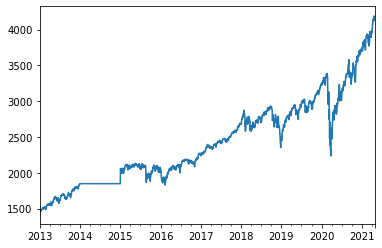

In [34]:
df['Close'].plot()

In [35]:
df.to_csv('snp500_2013_2021.csv')

In [18]:
os.listdir()

['.ipynb_checkpoints',
 'Download Data - INDEX_US_S&P US_SPX (1).csv',
 'Download Data - INDEX_US_S&P US_SPX (2).csv',
 'Download Data - INDEX_US_S&P US_SPX (3).csv',
 'Download Data - INDEX_US_S&P US_SPX (4).csv',
 'Download Data - INDEX_US_S&P US_SPX (5).csv',
 'Download Data - INDEX_US_S&P US_SPX (6).csv',
 'Download Data - INDEX_US_S&P US_SPX (7).csv',
 'Download Data - INDEX_US_S&P US_SPX.csv',
 'Untitled.ipynb']